## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [4]:
df = pd.read_csv("C:\\Users\\Sasi\\Desktop\\data science\\Machine learning\\Project 2 car\\AutoData (1).csv")

In [5]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2 : Data Cleaning and Preparation

In [9]:
dup = df.duplicated() #Checking duplicates values
print('Duplicate values :',dup.sum())

Duplicate values : 0


In [10]:
print('Total number of null values:',df.isnull().sum().sum()) #Checking null values

Total number of null values: 0


In [11]:
Company = df['make'].apply(lambda x : x.split(' ')[0])
df.insert(0,"Company",Company)
df.drop(['make'],axis=1,inplace=True)
df.head()

,Company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
df.Company = df.Company.str.lower()
def replace(a,b):
    df.Company.replace(a,b ,inplace = True)
replace('vokswagen','volkswagen')
replace('vw','volkswagen')
replace('toyouta','toyota')
replace('vw','volkswagen')
replace('maxda','mazda')
replace('porcshce','porsche')
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df.columns

Index(['Company', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Step 3: Visualizing the data

### Price

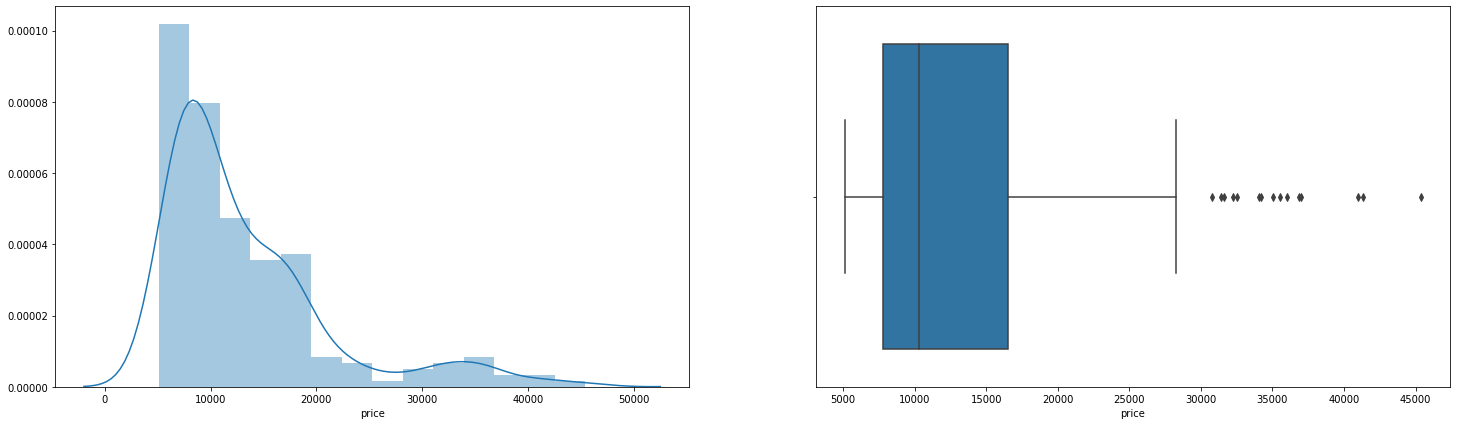

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25,7))
chart = sns.distplot(df['price'] , ax = ax[0])
chart1 = sns.boxplot(df['price'] , ax = ax[1])
plt.show()

In [16]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Inference :
* The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
* There is a significant difference between the mean and the median of the price distribution.
* The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

### Step 3.1 : Visualising Categorical Data

In [17]:
categorical = df.select_dtypes(include = 'object').columns
for i in categorical:
    print(i)

Company
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


### Company

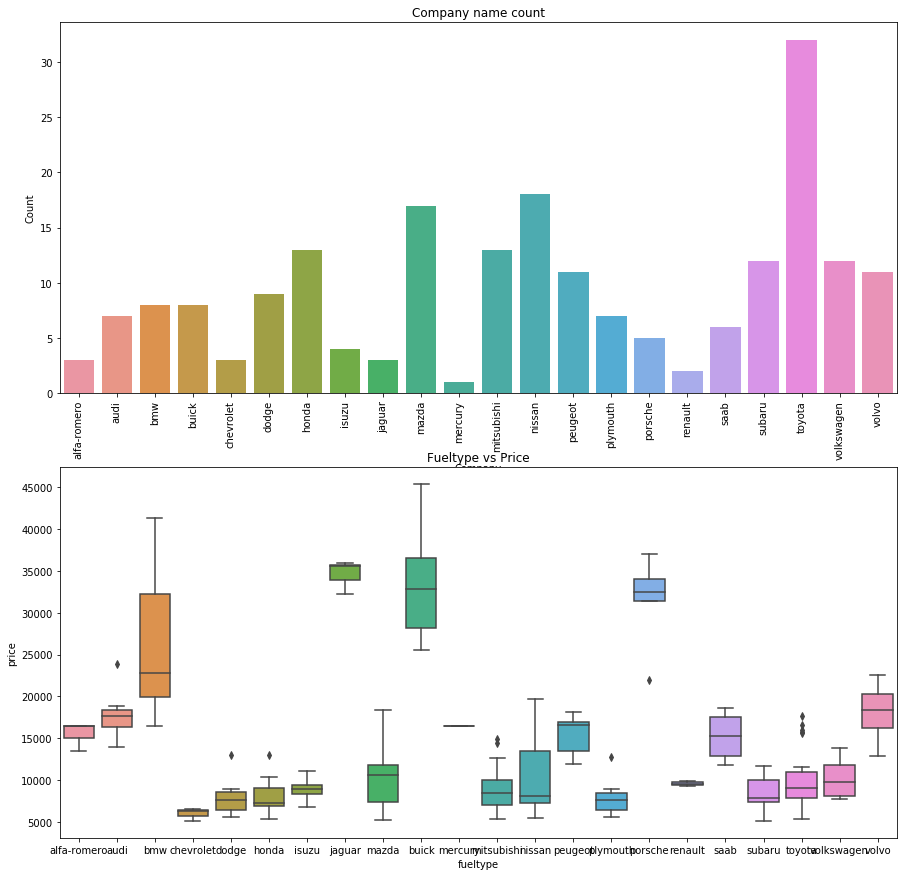

"p = df.groupby('Company').price.median()\nx2 = p.index.tolist()\ny2 = p.values.tolist()\nchart1 = sns.barplot(x2 ,y2 ,data = df, ax = ax[1])\nchart1.set_xticklabels(chart.get_xticklabels(), rotation=90)\nchart1.set(xlabel='Company', ylabel='Price', title='Company vs Price')\nplt.show()"

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15,15))
hp = df.groupby('Company').Company.count()
x1 = hp.index.tolist()
y1 = hp.values.tolist()
chart = sns.barplot(x1 ,y1 ,data = df, ax = ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Company', ylabel='Count', title='Company name count')

sns.boxplot(x = df.Company, y = df.price, ax = ax[1]).set(xlabel='fueltype', title='Fueltype vs Price')
plt.show()


'''p = df.groupby('Company').price.median()
x2 = p.index.tolist()
y2 = p.values.tolist()
chart1 = sns.barplot(x2 ,y2 ,data = df, ax = ax[1])
chart1.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart1.set(xlabel='Company', ylabel='Price', title='Company vs Price')
plt.show()'''

### Inference :
* Toyota is highest count and mercury is lowest count 
* Jaguar, porsche and buick are expensive car but jaguar is highest price


### Fuel type , Aspiration , door number

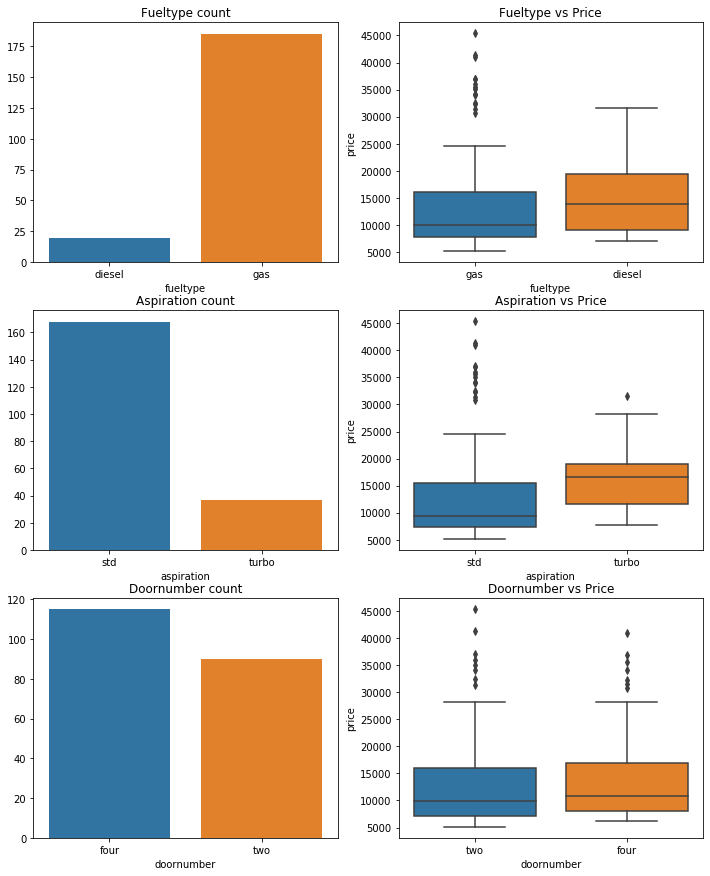

In [19]:
fig, ax = plt.subplots(nrows = 3 ,ncols = 2,figsize = (12,15))
T = df.groupby('fueltype').fueltype.count()
x1 = T.index.tolist()
y1 = T.values.tolist()
chart = sns.barplot(x1 ,y1 ,data = df, ax = ax[0,0])
chart.set(xlabel='fueltype', title='Fueltype count')

sns.boxplot(x = df.fueltype, y = df.price, ax = ax[0,1]).set(xlabel='fueltype', title='Fueltype vs Price')

d = df.groupby('aspiration').aspiration.count()
x2 = d.index.tolist()
y2 = d.values.tolist()
chart2 = sns.barplot(x2 ,y2 ,data = df, ax = ax[1,0])
chart2.set(xlabel='aspiration', title='Aspiration count')

sns.boxplot(x = df.aspiration, y = df.price, ax = ax[1,1]).set(xlabel='aspiration', title='Aspiration vs Price')

l= df.groupby('doornumber').doornumber.count()
x4 = l.index.tolist()
y4 = l.values.tolist()
chart4 = sns.barplot(x4 ,y4 ,data = df,ax = ax[2,0])
chart4.set(xlabel='doornumber', title='Doornumber count')

sns.boxplot(x = df.doornumber, y = df.price, ax = ax[2,1]).set(xlabel='doornumber', title='Doornumber vs Price')
plt.show()

### Inference :
* Number of gas fueled cars are more than diesel
* Gas cars has low price when compared to diesel cars
* standard aspriration cars are more than turbocharger
* standard aspriration cars price is less than turbocharge cars price
* Four doors are more than two doors
* four doors car is little bit costly than two doors car

### Carbody, Drivewheel, Enginelocation

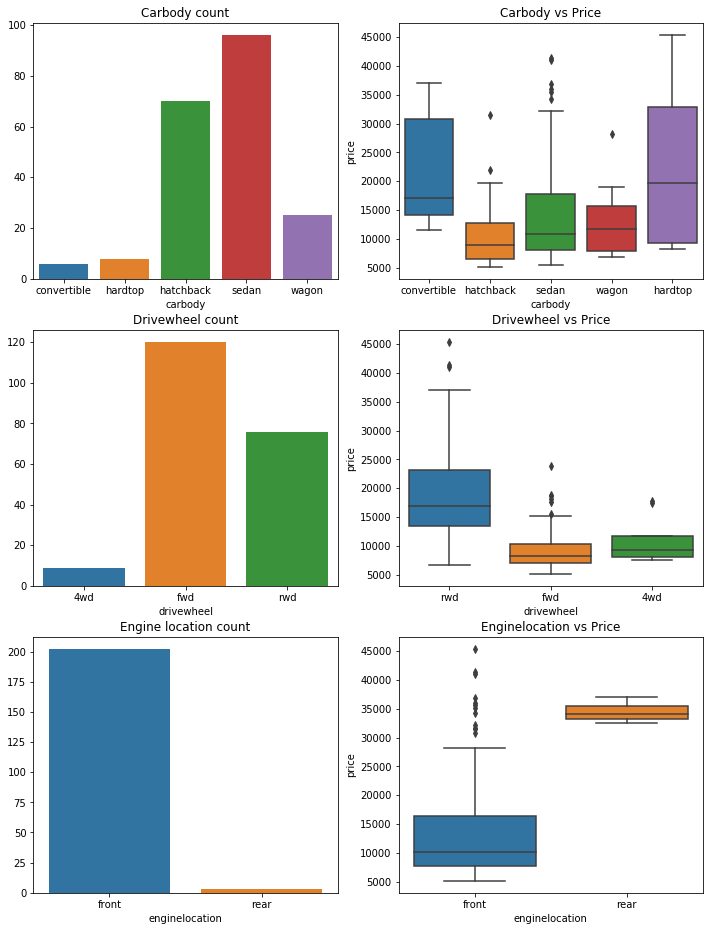

In [20]:
fig, ax = plt.subplots(nrows = 3 ,ncols = 2,figsize = (12,16))
T = df.groupby('carbody').carbody.count()
x1 = T.index.tolist()
y1 = T.values.tolist()
chart = sns.barplot(x1 ,y1 ,data = df, ax = ax[0,0])
chart.set(xlabel='carbody', title='Carbody count')

sns.boxplot(x = df.carbody, y = df.price, ax = ax[0,1]).set(xlabel='carbody', title='Carbody vs Price')


d = df.groupby('drivewheel').drivewheel.count()
x2 = d.index.tolist()
y2 = d.values.tolist()
chart2 = sns.barplot(x2 ,y2 ,data = df, ax = ax[1,0])
chart2.set(xlabel='drivewheel', title='Drivewheel count')

sns.boxplot(x = df.drivewheel, y = df.price, ax = ax[1,1]).set(xlabel='drivewheel', title='Drivewheel vs Price')


l= df.groupby('enginelocation').enginelocation.count()
x4 = l.index.tolist()
y4 = l.values.tolist()
chart4 = sns.barplot(x4 ,y4 ,data = df,ax = ax[2,0])
chart4.set(xlabel='enginelocation', title='Engine location count')
sns.boxplot(x = df.enginelocation, y = df.price, ax = ax[2,1]).set(xlabel='enginelocation', title='Enginelocation vs Price')

plt.show()

### Inference :
* Sedan is the top car prefered by customers
* Hardtop cars are more costly than other cars
* Front wheel drive is most prefered than others
* Rear wheel drive is costly than FWD, 4WD
* Engine location most prefered as front
* Rear engine location cars are more costlier

### Enginetype, Cylindernumber, Fuelsystem

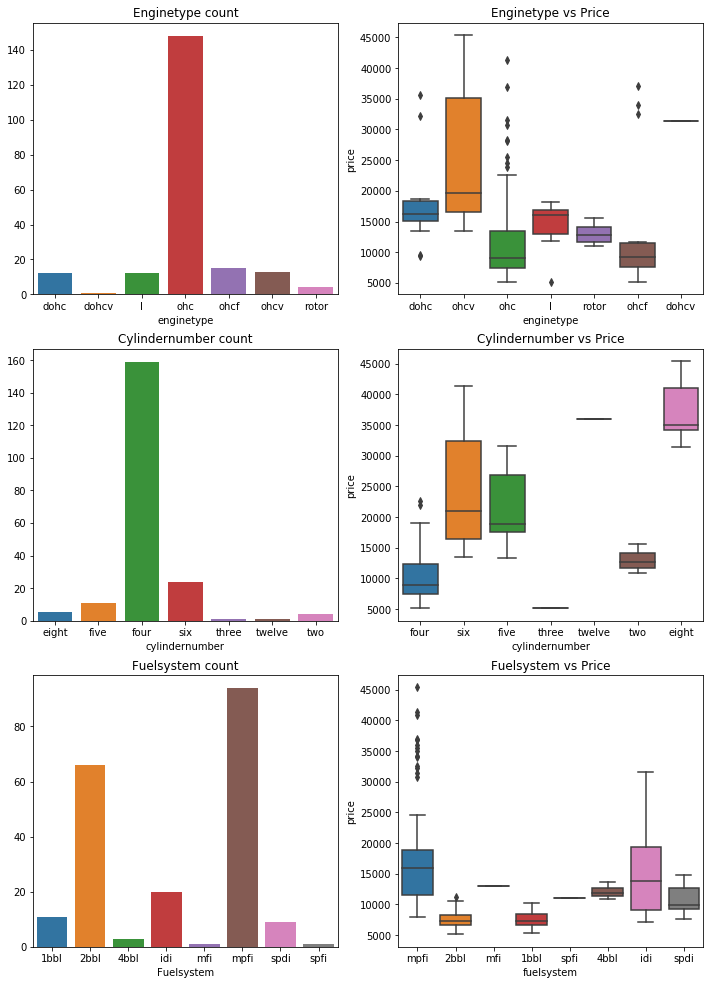

In [21]:
fig, ax = plt.subplots(nrows = 3 ,ncols = 2,figsize = (12,17))
T = df.groupby('enginetype').enginetype.count()
x1 = T.index.tolist()
y1 = T.values.tolist()
chart = sns.barplot(x1 ,y1 ,data = df, ax = ax[0,0])
chart.set(xlabel='enginetype', title='Enginetype count')

sns.boxplot(x = df.enginetype, y = df.price, ax = ax[0,1]).set(xlabel='enginetype', title='Enginetype vs Price')


d = df.groupby('cylindernumber').cylindernumber.count()
x2 = d.index.tolist()
y2 = d.values.tolist()
chart2 = sns.barplot(x2 ,y2 ,data = df, ax = ax[1,0])
chart2.set(xlabel='cylindernumber', title='Cylindernumber count')

sns.boxplot(x = df.cylindernumber, y = df.price, ax = ax[1,1]).set(xlabel='cylindernumber', title='Cylindernumber vs Price')


l= df.groupby('fuelsystem').fuelsystem.count()
x4 = l.index.tolist()
y4 = l.values.tolist()
chart4 = sns.barplot(x4 ,y4 ,data = df,ax = ax[2,0])
chart4.set(xlabel='Fuelsystem', title='Fuelsystem count')

sns.boxplot(x = df.fuelsystem, y = df.price, ax = ax[2,1]).set(xlabel='fuelsystem', title='Fuelsystem vs Price')

plt.show()

### Inference :
* Highly prefered engine type is ohc(An overhead camshaft)
* OHCV is highest price in engine type
* Four cylinder cars has high sales
* Eight cylinder cars has high cost
* Fuel system mpfi is highly prefered and 2bbl is second highest prefered
* IDI fuel system cars most costly cars

## Step 3.2 : Visualising Numerical Data

In [22]:
numeric = df.select_dtypes(include = np.number).columns
for i in numeric:
    print(i)

symboling
wheelbase
carlength
carwidth
carheight
curbweight
enginesize
boreratio
stroke
compressionratio
horsepower
peakrpm
citympg
highwaympg
price


## Symboling

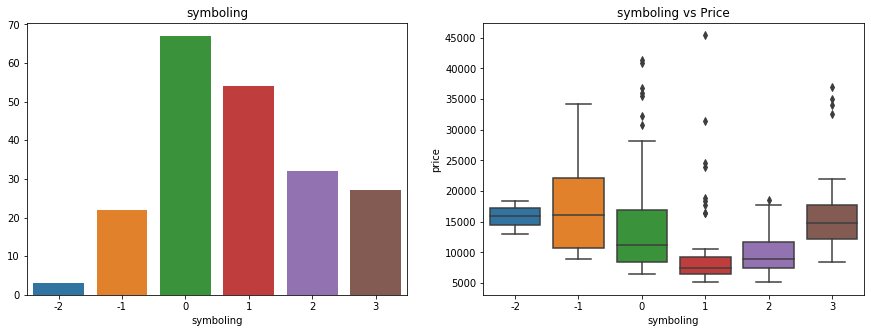

In [23]:
fig, ax = plt.subplots(nrows = 1 ,ncols = 2,figsize = (15,5))
l= df.groupby('symboling').symboling.count()
x4 = l.index.tolist()
y4 = l.values.tolist()
chart4 = sns.barplot(x4 ,y4 ,data = df,ax = ax[0])
chart4.set(xlabel='symboling', title='symboling')

sns.boxplot(x = df.symboling, y = df.price, ax = ax[1]).set(xlabel='symboling', title='symboling vs Price')
plt.show()

## Inference :
* Risk factor of the cars is very less
* Netural neither Risk or safe is high for all the cars

### Carlength, Carwidth, Carheight, Curbweight

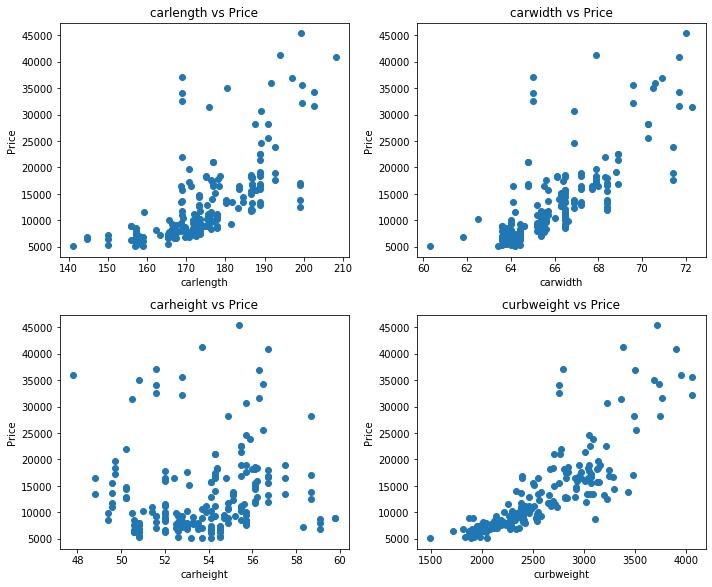

In [24]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
plt.figure(figsize=(10,20))
scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)
plt.tight_layout()

## Inference:
* carlength, carwidth, curbweight has positive corelation
* car heigth has no corelation to the price

### Enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg

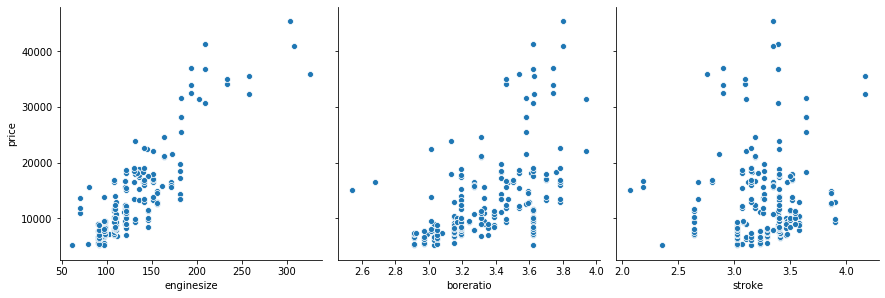

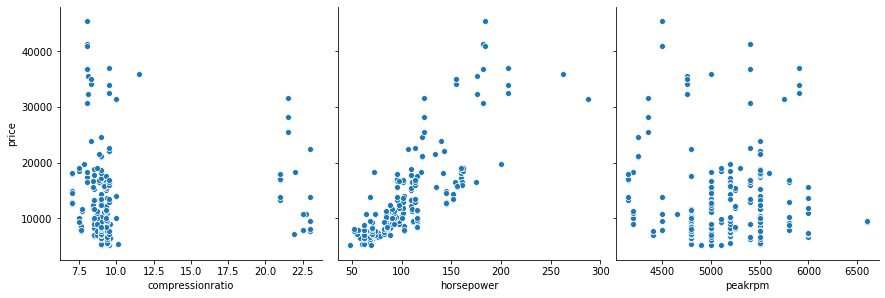

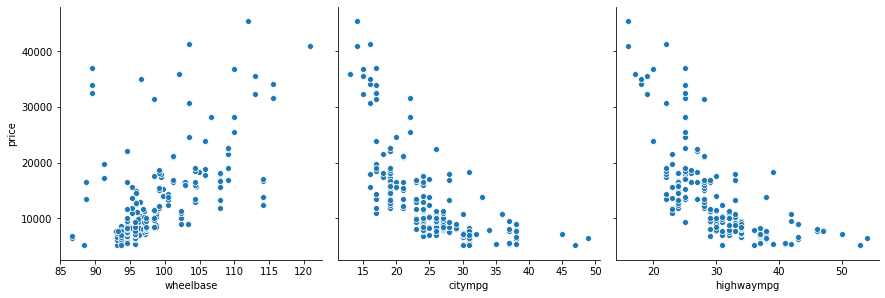

In [25]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

### Inference :
* wheelbase , horsepower, enginesize, boreratio has positive corelation with price 
* citympg , highwaympg has negative corelation

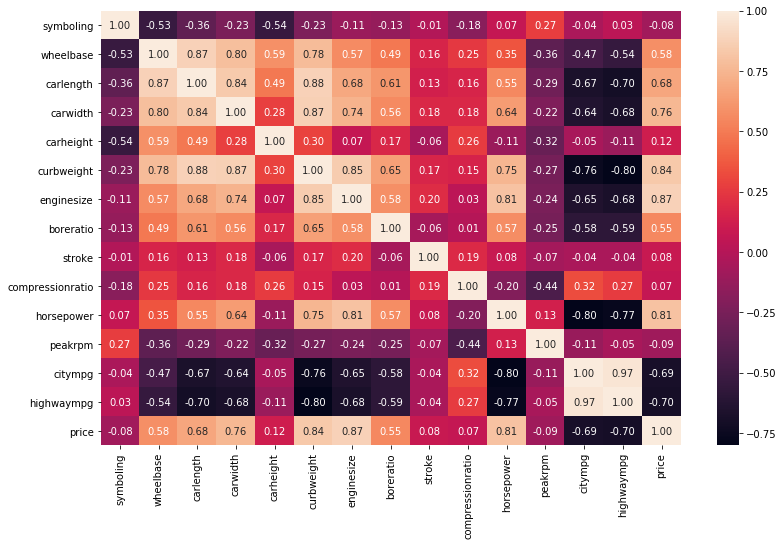

In [26]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot = True, fmt='.2f')
plt.show()

### Inference :
* Highest positive corelation for the price column is enginesize, curbweight, horsepower 
* Negative corelation columns are citympg , highwaympg

### Step 4 : Deriving new features

In [27]:
df['price'] = df['price'].astype('int')

In [28]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


In [29]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['Company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Company')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['range'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,Company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,range
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


## Step 5 :Scaling & Dummy Variables

In [30]:
df1 = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                     'carlength','carwidth', 'range','citympg','highwaympg']]

In [31]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x],prefix=x, drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr


df1 = dummies('aspiration',df1)
df1 = dummies('carbody',df1)
df1 = dummies('drivewheel',df1)
df1 = dummies('enginetype',df1)
df1 = dummies('cylindernumber',df1)
df1 = dummies('range',df1)
df1 = dummies('fueltype',df1)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
df1[num_vars] = scaler.fit_transform(df1[num_vars])
df1.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth', 'citympg', 'highwaympg',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'range_Medium',
       'range_Highend', 'fueltype_gas'],
      dtype='object')

In [33]:
df2 = df1.copy()
df1.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,...,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,range_Medium,range_Highend,fueltype_gas
0,0.207959,0.058309,0.411171,0.260377,0.664286,0.262500,0.413433,0.316667,0.222222,0.289474,...,0,0,1,0,0,0,0,1,0,1
1,0.282558,0.058309,0.411171,0.260377,0.664286,0.262500,0.413433,0.316667,0.222222,0.289474,...,0,0,1,0,0,0,0,1,0,1
2,0.282558,0.230321,0.517843,0.343396,0.100000,0.441667,0.449254,0.433333,0.166667,0.263158,...,0,0,0,1,0,0,0,1,0,1
3,0.219254,0.384840,0.329325,0.181132,0.464286,0.225000,0.529851,0.491667,0.305556,0.368421,...,0,0,1,0,0,0,0,1,0,1
4,0.306142,0.373178,0.518231,0.283019,0.464286,0.279167,0.529851,0.508333,0.138889,0.157895,...,0,1,0,0,0,0,0,1,0,1


### Step 6 : Model Building

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score

In [35]:
y = df1['price']
X = df1.iloc[:,1:]

In [36]:
np.random.seed(0)
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 101)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,10)
rfe = rfe.fit(X_train, y_train)

### Inference :
* selecting 15 main features from the column

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 8),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 9),
 ('horsepower', True, 1),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('citympg', False, 13),
 ('highwaympg', False, 3),
 ('aspiration_turbo', False, 20),
 ('carbody_hardtop', False, 7),
 ('carbody_hatchback', False, 4),
 ('carbody_sedan', False, 6),
 ('carbody_wagon', False, 5),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 21),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 16),
 ('enginetype_ohc', False, 17),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv', False, 2),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 22),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 11),
 ('range_Medium', False, 12),
 ('range_Highend', True, 1),
 ('fueltype_gas', False, 19)]

In [39]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'carwidth', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'range_Highend'],
      dtype='object')

In [40]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,carwidth,enginetype_dohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,range_Highend
150,0.192785,0.058333,0.275000,0,0,0,1,0,0,0
4,0.518231,0.279167,0.508333,0,0,1,0,0,0,0
15,0.675718,0.558333,0.550000,0,0,0,0,1,0,1
1,0.411171,0.262500,0.316667,0,0,0,1,0,0,0
43,0.329325,0.125000,0.125000,0,0,0,1,0,0,0


In [41]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [42]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     198.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.12e-78
Time:                        19:13:20   Log-Likelihood:                 241.85
No. Observations:                 153   AIC:                            -461.7
Df Residuals:                     142   BIC:                            -428.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

In [43]:
X_train_rfe = X_train_rfe.drop(["enginetype_rotor"], axis = 1)

## Model 2

In [44]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     217.4
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           8.63e-79
Time:                        19:13:21   Log-Likelihood:                 240.30
No. Observations:                 153   AIC:                            -460.6
Df Residuals:                     143   BIC:                            -430.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

#### Actions :
* Droping cylindernumber_two,enginetype_rotor columns for crossing p-value of 0.05 

In [45]:
X_train_rfe = X_train_rfe.drop(["cylindernumber_six","cylindernumber_five"], axis = 1)

In [46]:
checkVIF(X_train_rfe)

,Features,VIF
0,curbweight,31.70
2,carwidth,25.97
1,horsepower,8.53
4,cylindernumber_four,2.73
6,range_Highend,1.90
3,enginetype_dohcv,1.31
5,cylindernumber_twelve,1.13


### Model 3

In [47]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           2.29e-80
Time:                        19:13:21   Log-Likelihood:                 238.16
No. Observations:                 153   AIC:                            -460.3
Df Residuals:                     145   BIC:                            -436.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [48]:
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)

### Model 4

In [49]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     297.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.39e-79
Time:                        19:13:21   Log-Likelihood:                 232.25
No. Observations:                 153   AIC:                            -450.5
Df Residuals:                     146   BIC:                            -429.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.05

In [50]:
X_train_rfe = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

### Model 5 

In [51]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     350.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           8.89e-80
Time:                        19:13:21   Log-Likelihood:                 230.52
No. Observations:                 153   AIC:                            -449.0
Df Residuals:                     147   BIC:                            -430.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0446    

In [52]:
checkVIF(X_train_rfe)

,Features,VIF
1,carwidth,7.93
0,horsepower,6.12
3,cylindernumber_four,2.72
4,range_Highend,1.86
2,enginetype_dohcv,1.13


In [53]:
for i in X_train_rfe:
    print(i)

horsepower
carwidth
enginetype_dohcv
cylindernumber_four
range_Highend


In [54]:
#-----------------------------------------------------------

## Simple linear regression

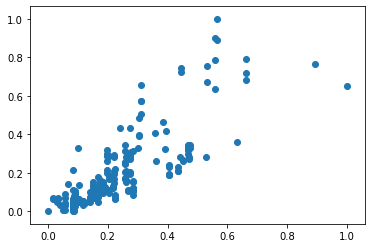

In [55]:
plt.scatter(x=df2['horsepower'], y = df2['price'])
plt.show()

In [56]:
X = df2['horsepower']
y = df2['price']

In [57]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 101)

In [58]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [59]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred_train = reg.predict(X_train)
y_pred_test =  reg.predict(X_test)
print(reg.intercept_)
print(reg.coef_)

[-0.01253485]
[[0.9211246]]


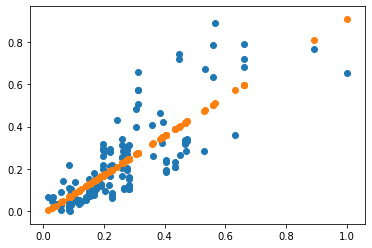

In [61]:
plt.scatter(x = X_train, y = y_train)
plt.scatter(x = X_train, y = y_pred_train)
plt.show()

In [62]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_train,y_pred_train))
print(r2_score(y_train,y_pred_train))
print()
print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

0.013139596367496538
0.6465041724665931

0.015152685166891387
0.6535521087576319


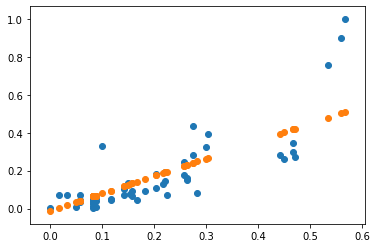

In [63]:
plt.scatter(x = X_test, y = y_test)
plt.scatter(x = X_test, y = y_pred_test)
plt.show()

## Multi Linear regression

In [79]:
X = df2[['horsepower','carwidth','enginetype_dohcv','cylindernumber_four','range_Highend']]
y = df2['price']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 101)

In [81]:
mreg = LinearRegression()
mreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred_train = mreg.predict(X_train)
y_pred_test =  mreg.predict(X_test)
print(mreg.intercept_)
print(mreg.coef_)

-0.044572757944189634
[ 0.41593345  0.32913523 -0.29817162 -0.04337029  0.25012593]


In [83]:
print(mean_squared_error(y_train,y_pred_train))
print(r2_score(y_train,y_pred_train))
print()
print(mean_squared_error(y_test,y_pred_test))
print(r2_score(y_test,y_pred_test))

0.002876235049541824
0.9226203712365562

0.005567032912966756
0.8727164992915994


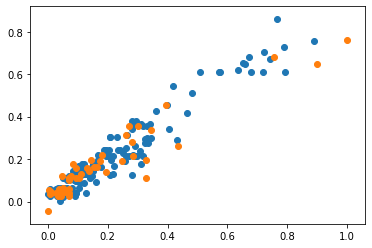

In [84]:
plt.scatter(x = y_train, y = y_pred_train)
plt.scatter(x = y_test, y = y_pred_test)
plt.show()